# Welcome to the MLE-Infrastructure 🔺
<a href="https://github.com/mle-infrastructure/mle-tutorial/blob/main/docs/logo_transparent.png?raw=true"><img src="https://github.com/mle-infrastructure/mle-tutorial/blob/main/docs/logo_transparent.png?raw=true" width="200" align="right" /></a>
In this tutorial we will get to know the basics of the MLE-Infrastructure. The overall aim is to provide a standardized workflow for ML experimentation, which allows you to track and easily scale your scientific experiments. It consists of 5 different sub-packages, which integrate neatly together:

1. **[`mle-logging`](https://github.com/mle-infrastructure/mle-logging)**: A Lightweight Logger for ML Experiments 📖 [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mle-infrastructure/mle-logging/blob/main/examples/getting_started.ipynb)
2. **[`mle-scheduler`](https://github.com/mle-infrastructure/mle-scheduler)**: A Lightweight Cluster/Cloud VM Job Management Tool 🚀 [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mle-infrastructure/mle-scheduler/blob/main/examples/getting_started.ipynb)
3. **[`mle-hyperopt`](https://github.com/mle-infrastructure/mle-hyperopt)**: A Lightweight Hyperparameter Optimization Tool 🚂 [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mle-infrastructure/mle-hyperopt/blob/main/examples/getting_started.ipynb)
4. **[`mle-monitor`](https://github.com/mle-infrastructure/mle-monitor)**: A Lightweight Experiment & Resource Monitoring Tool 📺 [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mle-infrastructure/mle-monitor/blob/main/examples/getting_started.ipynb)
5. **[`mle-toolbox`](https://github.com/mle-infrastructure/mle-toolbox)**: A Lightweight Tool to Manage Distributed ML Experiments 🛠 [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mle-infrastructure/mle-tutorial/blob/main/tutorial.ipynb)

If you would like to get a more detailed introduction, please check out the respective Colab notebooks.

<img src="https://github.com/mle-infrastructure/mle-tutorial/blob/main/docs/toolbox_overview.png?raw=true" alt="drawing" width="900"/>

In [1]:
# Install all required dependencies
try:
    import mle_toolbox
except:
    !pip -q install mle-toolbox

# Check if code is run in Colab: If so -- download configs from repo
try:
    import google.colab
    IN_COLAB = True
    !git clone https://github.com/mle-infrastructure/mle-tutorial
    !cd mle-tutorial
    !ls
except:
    IN_COLAB = False

# Log your Experiments with `mle-logging` 📖 [![GitHub stars](https://img.shields.io/github/stars/mle-infrastructure/mle-logging.svg?style=social)](https://GitHub.com/mle-infrastructure/mle-logging/stargazers/)

<img src="https://github.com/mle-infrastructure/mle-logging/blob/main/docs/mle_logger_structure.png?raw=true" alt="drawing" width="900"/>

### Define surrogate network training function

In [2]:
from mle_logging import MLELogger

def train_your_net(epoch: int, seed_id: int, lrate: float, batch_size: int, arch: str):
    """Optimum: lrate=0.2, batch_size=4, arch='conv'."""
    import random
    f1 = (lrate - 0.2) ** 2 + (batch_size - 4) ** 2 + (0 if arch == "conv" else 10)
    train_loss = f1 + seed_id * 0.5
    test_loss = f1 + seed_id * 0.5 + random.uniform(0, 0.3)
    return train_loss / epoch, test_loss / epoch

### Load training configuration from `.yaml` file

In [3]:
from mle_logging.utils import load_yaml_config

train_config = {"lrate": 0.2,
                "batch_size": 4,
                "arch": "mlp"}

config_fname = "configs/base_config_1.yaml"
train_config = load_yaml_config(config_fname)

### Instantiate a logger for your training run

In [4]:
seed_id = 1

log = MLELogger(
    experiment_dir="experiments/log_logging",
    config_fname=config_fname,
    seed_id=seed_id,
    time_to_track=["num_epochs"],
    what_to_track=["train_loss", "test_loss"],
    print_every_k_updates=2,
    verbose=True
)

╭──────────────────────────────────────────────────────────────────────────────╮
│  __    __  __      ______  __      ______  ______          09/12/21 12:54:20 │
│ /\ "-./  \/\ \    /\  ___\/\ \    /\  __ \/\  ___\          Logger v0.0.4 🔏 │
│ \ \ \-./\ \ \ \___\ \  __\  \ \___\ \ \/\ \ \ \__ \         ]8;id=555205;https://twitter.com/RobertTLange\@RobertTLange]8;;\ 🐦 │
│  \ \_\ \ \_\ \_____\ \_____\ \_____\ \_____\ \_____\         ]8;id=375521;https://github.com/RobertTLange/mle-logging/blob/main/examples/getting_started.ipynb\MLE-Log Docs]8;;\ 📓 │
│   \/_/  \/_/\/_____/\/_____/\/_____/\/_____/\/_____/         ]8;id=417051;https://github.com/RobertTLange/mle-logging/\MLE-Log Repo]8;;\ 📝 │
╰──────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────────────────────────────────╮
│ ╭────────────────────────────────────╮╭────────────────────────────────────╮ │
│ │ 📖 Log Dir:                        ││ 📄 Config:                         │ │
│ │ experiments/log_logging/base_conf… ││ configs/base_config_1.yaml         │ │
│ ╰────────────────────────────────────╯╰────────────────────────────────────╯ │
│ ╭────────────────────────────────────╮╭────────────────────────────────────╮ │
│ │ ⌚ Time: num_epochs                ││ 📉 Stats: train_loss, test_loss    │ │
│ ╰────────────────────────────────────╯╰────────────────────────────────────╯ │
│ ╭────────────────────────────────────╮╭────────────────────────────────────╮ │
│ │ 🌱 Seed ID: 1                      ││ 🚀 Model: no-model-type            │ │
│ ╰────────────────────────────────────╯╰────────────────────────────────────╯ │
╰──────────────────────────────────────────────────────────────────────────────╯

### Log the training statistics

In [5]:
for epoch in range(1, 11):
    train_loss, test_loss = train_your_net(epoch, seed_id, **train_config)
    log.update(
        {"num_epochs": epoch},
        {"train_loss": train_loss, "test_loss": test_loss},
        save=True,
    )

                                                                         
         ⌚ time           num_epochs    📉 train_loss     test_loss            
        ───────────────────────────────────────────────────────────────         
         21-12-09/12:54        2              5.25           5.3867             
                                                                        

                                                                         
         21-12-09/12:54        4             2.625           2.648              
                                                                        

                                                                         
         21-12-09/12:54        6              1.75           1.7849             
                                                                        

                                                                         
         21-12-09/12:54        8             1.3125          1.3249             
                                                                        

                                                                         
         21-12-09/12:54        10             1.05           1.0706             
                                                                        

### Log model checkpoints & generated figures

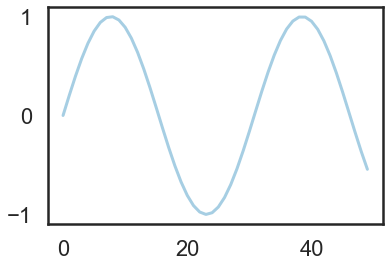

In [6]:
import torch.nn as nn

# Create a dummy torch model to store
class DummyModel(nn.Module):
    def __init__(self):
        super(DummyModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
model = DummyModel()

# Create a dummy plot to store
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.sin(np.linspace(0, 10, 50)))

# Create a dummy dictionary to store
some_dict = {"hi": "there"} 

In [9]:
log = MLELogger(
    experiment_dir="experiments/log_model",
    config_dict=train_config,
    seed_id=seed_id,
    time_to_track=["num_epochs"],
    what_to_track=["train_loss", "test_loss"],
    model_type="torch",
    verbose=True
)

# Or do everything in one go
time_tic = {'num_updates': 10, 'num_epochs': 1}
stats_tic = {'train_loss': 0.1234, 'test_loss': 0.1235}
log.update(time_tic, stats_tic, model, fig, some_dict, save=True)

╭──────────────────────────────────────────────────────────────────────────────╮
│  __    __  __      ______  __      ______  ______          09/12/21 12:54:50 │
│ /\ "-./  \/\ \    /\  ___\/\ \    /\  __ \/\  ___\          Logger v0.0.4 🔏 │
│ \ \ \-./\ \ \ \___\ \  __\  \ \___\ \ \/\ \ \ \__ \         ]8;id=292752;https://twitter.com/RobertTLange\@RobertTLange]8;;\ 🐦 │
│  \ \_\ \ \_\ \_____\ \_____\ \_____\ \_____\ \_____\         ]8;id=32083;https://github.com/RobertTLange/mle-logging/blob/main/examples/getting_started.ipynb\MLE-Log Docs]8;;\ 📓 │
│   \/_/  \/_/\/_____/\/_____/\/_____/\/_____/\/_____/         ]8;id=496043;https://github.com/RobertTLange/mle-logging/\MLE-Log Repo]8;;\ 📝 │
╰──────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────────────────────────────────╮
│ ╭──────────────────────────────────────╮╭──────────────────────────────────╮ │
│ │ 📖 Log Dir: experiments/log_model    ││ 📄 Config: None                  │ │
│ ╰──────────────────────────────────────╯╰──────────────────────────────────╯ │
│ ╭──────────────────────────────────────╮╭──────────────────────────────────╮ │
│ │ ⌚ Time: num_epochs                  ││ 📉 Stats: train_loss, test_loss  │ │
│ ╰──────────────────────────────────────╯╰──────────────────────────────────╯ │
│ ╭──────────────────────────────────────╮╭──────────────────────────────────╮ │
│ │ 🌱 Seed ID: 1                        ││ 🚀 Model: torch                  │ │
│ ╰──────────────────────────────────────╯╰──────────────────────────────────╯ │
╰──────────────────────────────────────────────────────────────────────────────╯

                                                                                
  📩 - Figure    experiments/log_model/figures/fig_1_seed_1.png                 
  📩 - Extra     experiments/log_model/extra/extra_1_seed_1.pkl                 
  📩 - Model     experiments/log_model/models/final/final_seed_1.pt             
                                                                                

                                                                         
         ⌚ time           num_epochs    📉 train_loss     test_loss            
        ───────────────────────────────────────────────────────────────         
         21-12-09/12:54        1             0.1234          0.1235             
                                                                        

### Reload and plot the results

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'train_loss, test_loss'}, xlabel='num_epochs', ylabel='train_loss, test_loss'>)

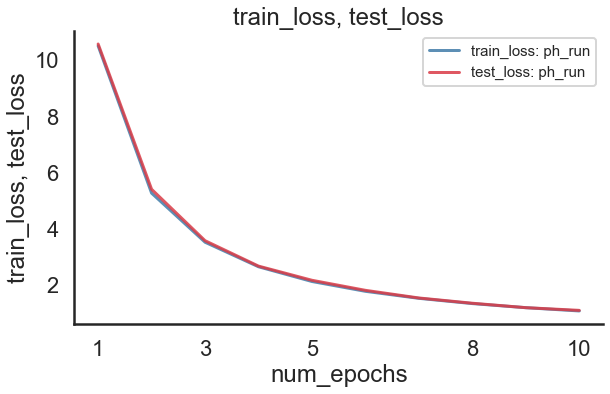

In [10]:
# Reload log & visualize the data
from mle_logging import load_log
log = load_log("experiments/log_logging/base_config_1")
log.plot(["train_loss", "test_loss"])

# Launch your Experiments with `mle-scheduler` 🚀 [![GitHub stars](https://img.shields.io/github/stars/mle-infrastructure/mle-scheduler.svg?style=social)](https://GitHub.com/mle-infrastructure/mle-scheduler/stargazers/)

<img src="https://github.com/mle-infrastructure/mle-scheduler/blob/main/docs/mle_scheduler_structure.png?raw=true" alt="drawing" width="900"/>

### Schedule queue of experiments with different seeds & configurations

In [11]:
from mle_scheduler import MLEQueue

queue = MLEQueue(resource_to_run="local",
                 job_filename="train.py",
                 config_filenames=["configs/base_config_1.yaml",
                                   "configs/base_config_2.yaml"],
                 random_seeds=[0, 1],
                 experiment_dir="experiments/logs_queue")

queue.run()

Output()

MLEQueue - local • 4/4 Jobs ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 0:00:01 ⌛

### Automatically merge logs into a single `meta_log.hdf5`

In [12]:
from mle_scheduler import MLEQueue

queue = MLEQueue(resource_to_run="local",
                 job_filename="train.py",
                 config_filenames=["configs/base_config_1.yaml",
                                   "configs/base_config_2.yaml"],
                 random_seeds=[0, 1],
                 experiment_dir="experiments/logs_queue",
                 automerge_configs=True)

queue.run()

Output()

MLEQueue - local • 4/4 Jobs ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 0:00:01 ⌛

### Load in the log and visualize different runs

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'test_loss'}, xlabel='num_epochs', ylabel='test_loss'>)

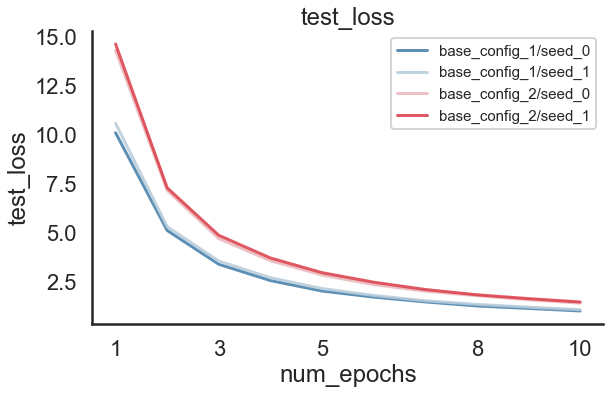

In [18]:
from mle_logging import load_meta_log
meta_log = load_log("experiments/logs_queue/meta_log.hdf5", aggregate_seeds=False)
meta_log.plot("test_loss")

### Schedule Jobs on a Slurm Cluster

```python
# Each job requests 5 CPU cores & 1 V100S GPU w. CUDA 10.0 loaded
job_args = {
    "partition": "<SLURM_PARTITION>",  # Partition(s) to schedule jobs on
    "env_name": "mle-toolbox",  # Env to activate at job start-up
    "use_conda_venv": True,  # Whether to use anaconda venv
    "num_logical_cores": 5,  # Number of requested CPU cores per job
    "num_gpus": 1,  # Number of requested GPUs per job
    "gpu_type": "V100S",  # GPU model requested for each job
    "modules_to_load": "nvidia/cuda/10.0"  # Modules to load at start-up
}


queue = MLEQueue(
    resource_to_run="slurm-cluster",
    job_filename="train.py",
    job_arguments=job_args,
    config_filenames=["base_config_1.yaml",
                      "base_config_2.yaml"],
    experiment_dir="logs_queue_slurm",
    random_seeds=[0, 1]
)
queue.run()
```

### Schedule Jobs on a Grid Engine Cluster

```python
# Each job requests 5 CPU cores & 1 RTX 2080 GPU
job_args = {
    "queue": "<SGE_QUEUE>",  # Partition(s) to schedule jobs on
    "env_name": "mle-toolbox",  # Env to activate at job start-up
    "use_conda_venv": True,  # Whether to use anaconda venv
    "num_logical_cores": 5,  # Number of requested CPU cores per job
    "num_gpus": 1,  # Number of requested GPUs per job
    "gpu_type": "RTX2080",  # GPU model requested for each job
    "gpu_prefix": "cuda"  # Prefix for requiring GPUs
}


queue = MLEQueue(
    resource_to_run="sge-cluster",
    job_filename="train.py",
    job_arguments=job_args,
    config_filenames=["base_config_1.yaml",
                      "base_config_2.yaml"],
    experiment_dir="logs_queue_sge",
    random_seeds=[0, 1]
)
queue.run()
```

# Hyperparameter Search with `mle-hyperopt` 🚂 [![GitHub stars](https://img.shields.io/github/stars/mle-infrastructure/mle-hyperopt.svg?style=social)](https://GitHub.com/mle-infrastructure/mle-hyperopt/stargazers/)

<img src="https://github.com/mle-infrastructure/mle-hyperopt/blob/main/docs/mle_hyperopt_structure.png?raw=true" alt="drawing" width="900"/>

### Setup a grid search for different variable types

In [ ]:
from mle_hyperopt import GridSearch, RandomSearch

# Instantiate random search class
strategy = GridSearch(
    real={"lrate": {"begin": 0.1, "end": 0.5, "bins": 5}},
    integer={"batch_size": {"begin": 1, "end": 5, "bins": 5}},
    categorical={"arch": ["mlp", "cnn"]},
    verbose=True,
)

### Ask and store two configurations locally

In [ ]:
# Ask for configurations to evaluate & run parallel eval of seeds * configs
configs, config_fnames = strategy.ask(2, store=True)
configs

### Evaluate two seeds for each configuration with `MLEQueue`

In [ ]:
queue = MLEQueue(
    resource_to_run="local",
    job_filename="train.py",
    config_filenames=config_fnames,
    random_seeds=[1, 2],
    experiment_dir="experiments/logs_search",
    automerge_configs=True
)
queue.run()

### Get performance from the `meta_log` & update the strategy

In [ ]:
from mle_logging import load_meta_log
meta_log = load_meta_log("experiments/logs_search/meta_log.hdf5")
test_scores = [meta_log[r].stats.test_loss.mean[-1] for r in queue.mle_run_ids]

strategy.tell(configs, test_scores)

# Protocol your Experiments with `mle-monitor` 📺 [![GitHub stars](https://img.shields.io/github/stars/mle-infrastructure/mle-monitor.svg?style=social)](https://GitHub.com/mle-infrastructure/mle-monitor/stargazers/)

<img src="https://github.com/mle-infrastructure/mle-monitor/blob/main/docs/mle_monitor_structure.png?raw=true" alt="drawing" width="900"/>

### Add a new experiment to the protocol database

In [ ]:
from mle_monitor import MLEProtocol

# Load (existing) protocol database and add experiment data
protocol_db = MLEProtocol("mle_protocol.db")
meta_data = {
    "purpose": "random search",  # Purpose of experiment
    "project_name": "surrogate",  # Project name of experiment
    "exec_resource": "local",  # Resource jobs are run on
    "experiment_dir": "logs_search",  # Experiment log storage directory
    "experiment_type": "hyperparameter-search",  # Type of experiment to run
    "base_fname": "train.py",  # Main code script to execute
    "config_fname": "configs/base_config_1.yaml",  # Config file path of experiment
    "num_seeds": 2,  # Number of evaluations seeds
    "num_total_jobs": 4,  # Number of total jobs to run
    "num_jobs_per_batch": 4,  # Number of jobs in single batch
    "num_job_batches": 1,  # Number of sequential job batches
    "time_per_job": "00:00:02",  # Expected duration: days-hours-minutes
}

new_experiment_id = protocol_db.add(meta_data)

### Run experiment, update job counter & get test scores

In [ ]:
queue = MLEQueue(
    resource_to_run="local",
    job_filename="train.py",
    config_filenames=config_fnames,
    random_seeds=[1, 2],
    experiment_dir="experiments/logs_protocol",
    protocol_db=protocol_db,
)
queue.run()

# Merge logs of random seeds & configs -> load & get final scores
queue.merge_configs(merge_seeds=True)
meta_log = load_meta_log("experiments/logs_protocol/meta_log.hdf5")
test_scores = [meta_log[r].stats.test_loss.mean[-1] for r in queue.mle_run_ids]

### Update strategy and protocol

In [ ]:
# Instantiate random search class
strategy = RandomSearch(
    real={"lrate": {"begin": 0.1, "end": 0.5, "prior": "log-uniform"}},
    integer={"batch_size": {"begin": 1, "end": 5, "prior": "uniform"}},
    categorical={"arch": ["mlp", "cnn"]},
    verbose=True,
)

# Ask for configurations to evaluate & run parallel eval of seeds * configs
configs, config_fnames = strategy.ask(2, store=True)

In [ ]:
# Update the hyperparameter search strategy
strategy.tell(configs, test_scores)

# Wrap up experiment (store completion time, etc.)
protocol_db.complete(new_experiment_id)

# Putting it all together with `mle-toolbox` 🛠 [![GitHub stars](https://img.shields.io/github/stars/mle-infrastructure/mle-toolbox.svg?style=social)](https://GitHub.com/mle-infrastructure/mle-toolbox/stargazers/)

<img src="https://github.com/mle-infrastructure/mle-toolbox/blob/main/docs/mle_toolbox_structure.png?raw=true" alt="drawing" width="900"/>

### Run experiment with `mle run` from command line

In [ ]:
!mle run configs/grid_search.yaml --purpose Grid Search

### Load in results & analyze

In [ ]:
from mle_toolbox import load_result_logs

meta_log, hyper_log = load_result_logs("experiments)